In [1]:
import tensorflow as tf
import keras
from keras.callbacks import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import *

Using TensorFlow backend.


In [2]:
traindata = pd.read_csv('sign_mnist_train.csv')

In [3]:
trainlabel=traindata['label'].values

In [4]:
traindata.drop('label',inplace=True,axis=1)
trainimages = traindata.values

In [5]:
trainimages=trainimages.reshape(-1,28,28,1)

In [6]:
testdata = pd.read_csv('sign_mnist_test.csv')

In [7]:
testlabel=testdata['label'].values

In [8]:
testdata.drop('label',inplace=True,axis=1)
testimages = testdata.values

In [9]:
testimages=testimages.reshape(-1,28,28,1)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [11]:
traingen=ImageDataGenerator(rotation_range=40,zoom_range=0.2,width_shift_range=0.2,height_shift_range=0.2,
                  shear_range=0.2,horizontal_flip=True,rescale=1/255.0,validation_split=0.2)

In [12]:
traindata_generator = traingen.flow(trainimages,trainlabel,subset='training')
validationdata_generator = traingen.flow(trainimages,trainlabel,subset='validation')

In [13]:
testgen=ImageDataGenerator(rescale=1/255.0)
testdata_generator = testgen.flow(testimages,testlabel)

In [14]:
model=Sequential([])

model.add(Conv2D(64,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(BatchNormalization())
# model.add(Conv2D(64,(3,3),activation="relu"))
# model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
#model.add(Dropout(0.4))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(BatchNormalization())
# model.add(Conv2D(128,(3,3),activation="relu"))
# model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
#model.add(Dropout(0.4))

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(256,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(26,activation="softmax"))



In [15]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 11, 11, 128)       512       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)             

In [17]:
# Define a Callback class that stops training once accuracy reaches 97.0%
class myCallback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.985):
      print("\nReached 98.5% accuracy so cancelling training!")
      self.model.stop_training = True
callback=myCallback()

In [18]:
history=model.fit(traindata_generator,epochs=60,validation_data=validationdata_generator,callbacks=[callback])

Epoch 1/60
687/687 [==============================] - 11s 15ms/step - loss: 2.7611 - accuracy: 0.2189 - val_loss: 2.1016 - val_accuracy: 0.2892
Epoch 2/60
687/687 [==============================] - 8s 11ms/step - loss: 1.8588 - accuracy: 0.4048 - val_loss: 3.9209 - val_accuracy: 0.2187
Epoch 3/60
687/687 [==============================] - 8s 11ms/step - loss: 1.5395 - accuracy: 0.5031 - val_loss: 1.3936 - val_accuracy: 0.4161
Epoch 4/60
687/687 [==============================] - 8s 11ms/step - loss: 1.3530 - accuracy: 0.5578 - val_loss: 3.6822 - val_accuracy: 0.2672
Epoch 5/60
687/687 [==============================] - 8s 11ms/step - loss: 1.2335 - accuracy: 0.5927 - val_loss: 1.1159 - val_accuracy: 0.5624
Epoch 6/60
687/687 [==============================] - 8s 11ms/step - loss: 1.1525 - accuracy: 0.6126 - val_loss: 0.7213 - val_accuracy: 0.6573
Epoch 7/60
687/687 [==============================] - 8s 11ms/step - loss: 1.0875 - accuracy: 0.6387 - val_loss: 1.0366 - val_accuracy: 0.688

Epoch 58/60
687/687 [==============================] - 8s 11ms/step - loss: 0.4748 - accuracy: 0.8387 - val_loss: 0.4171 - val_accuracy: 0.7744
Epoch 59/60
687/687 [==============================] - 8s 11ms/step - loss: 0.4527 - accuracy: 0.8453 - val_loss: 0.4988 - val_accuracy: 0.8955
Epoch 60/60
687/687 [==============================] - 8s 11ms/step - loss: 0.4663 - accuracy: 0.8427 - val_loss: 0.5061 - val_accuracy: 0.8086


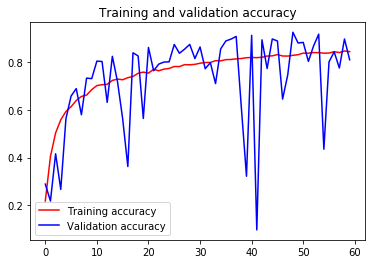

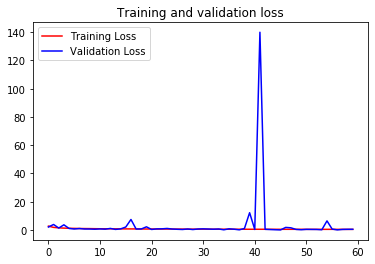

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [20]:
print("test accuracy: "+ str(model.evaluate_generator(testdata_generator)[1]*100))

test accuracy: 91.98271036148071
